### Project objective

1. Volume of stock traded
2. Netflix Stock Price- High, Open, Close
3. Netflix Stock Price- Day, Month, Year Wise
4. Top-5 Dates with Highest Stock Price
5. Top-5 Dates with Lowest Stock Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime

In [2]:
df=pd.read_csv("Netflix.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [4]:
sns.set(rc={'figure.figsize':(10,5)})

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


### 1. Analysis of Volume of stock traded

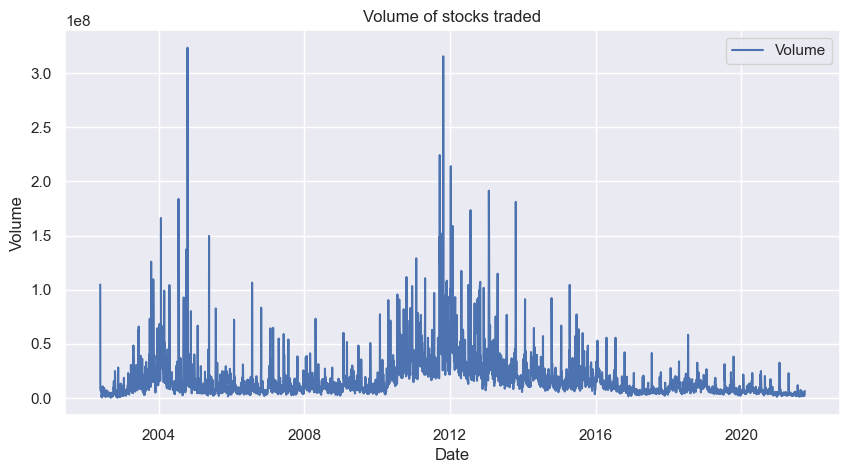

In [6]:
sns.lineplot(x=df.index, y=df['Volume'], label='Volume')
plt.title("Volume of stocks traded")
plt.show()

### 2. Netflix Stock Price- High, Open, Close

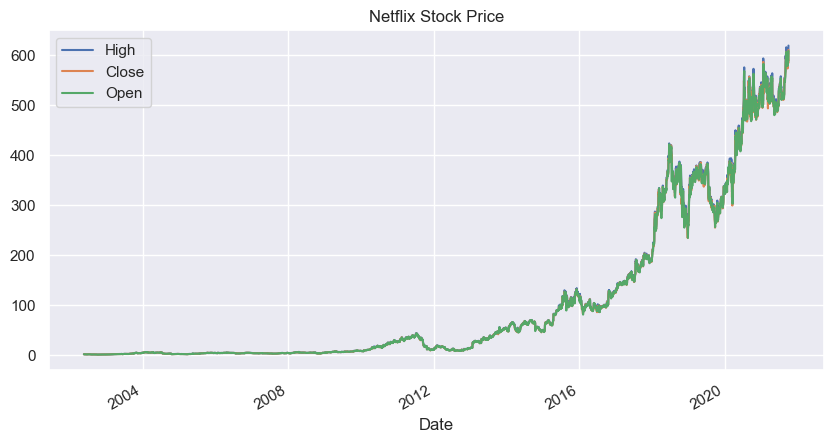

In [7]:
df.plot(y=['High','Close','Open'],title="Netflix Stock Price")
plt.show()

### 3. Netflix Stock Price- Day, Month, Year Wise

<AxesSubplot:xlabel='Year'>

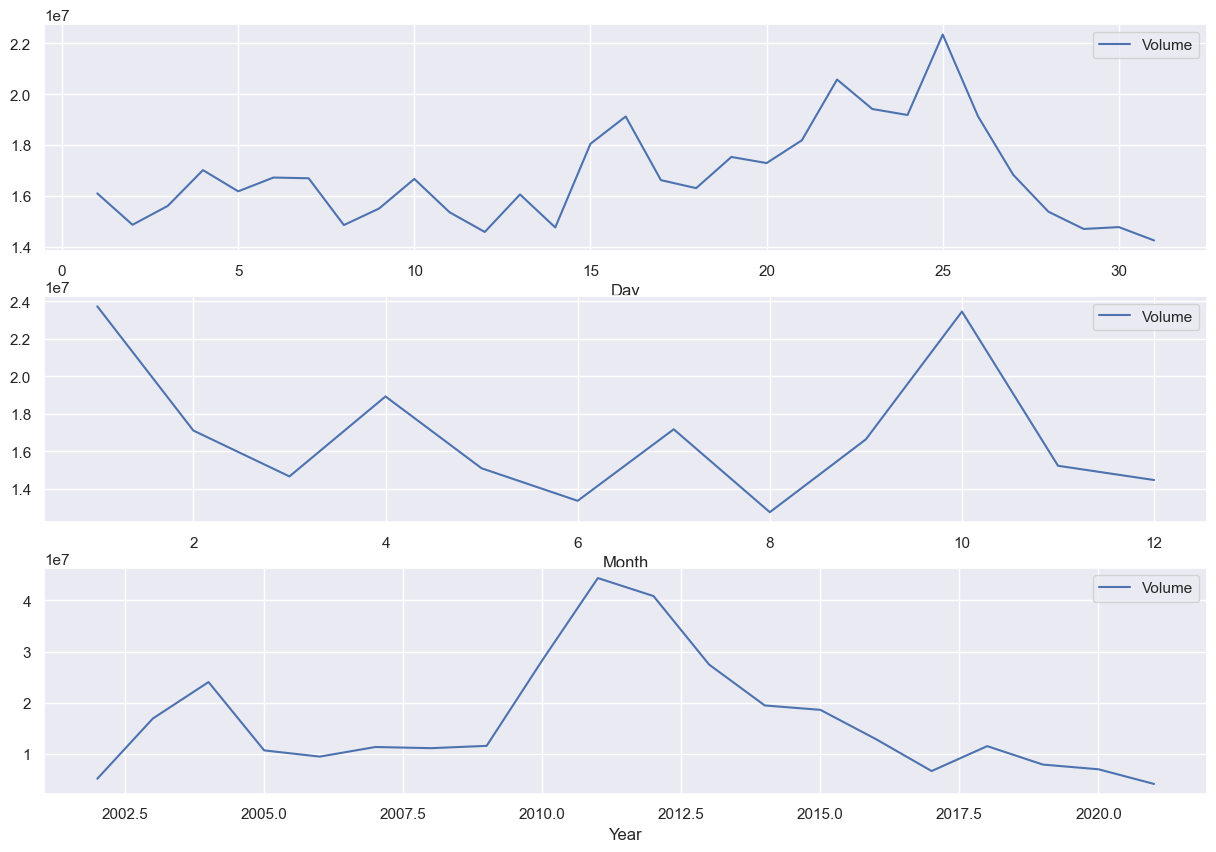

In [8]:
fig, (ax1,ax2,ax3)=plt.subplots(3,figsize=(15,10))
df.groupby(df.index.day).mean().plot(y='Volume',ax=ax1, xlabel='Day')
df.groupby(df.index.month).mean().plot(y='Volume',ax=ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y='Volume',ax=ax3, xlabel='Year')

### 4. Top-5 Dates with Highest Stock Price

In [9]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400
2002-06-03,1.080000,1.149286,1.076429,1.128571,1.128571,3151400
2002-06-04,1.135714,1.140000,1.110714,1.117857,1.117857,3105200
2002-06-05,1.110714,1.159286,1.107143,1.147143,1.147143,1531600


In [10]:
a=df.sort_values(by='High',ascending=False).head(5)
print(a['High'])

Date
2021-09-30    619.000000
2021-09-08    615.599976
2021-09-07    613.849976
2021-09-29    609.880005
2021-09-10    609.450012
Name: High, dtype: float64


In [11]:
b=df.sort_values(by='Low',ascending=True).head(5)
print(b['Low'])

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64


<AxesSubplot:xlabel='Date', ylabel='Low'>

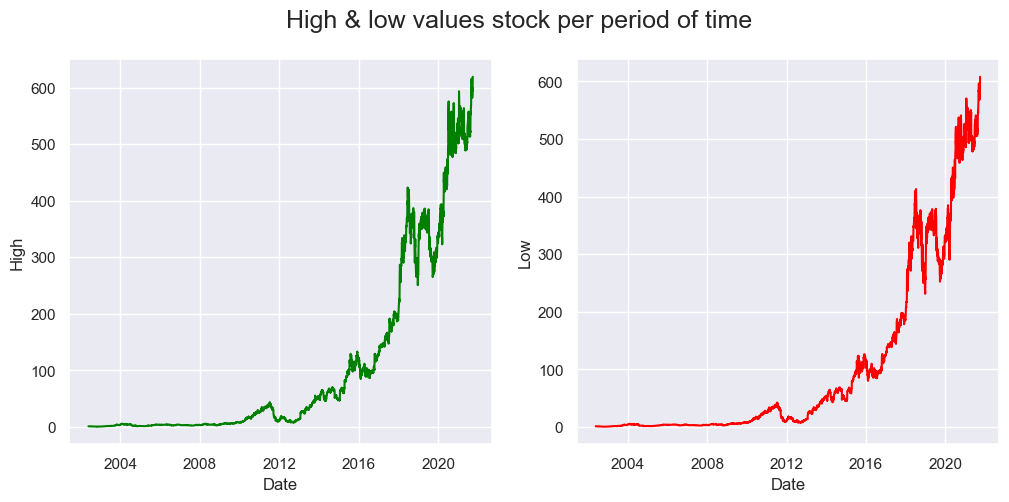

In [12]:
fig,axes= plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12,5))
fig.suptitle('High & low values stock per period of time', fontsize= 18)
sns.lineplot(ax= axes[0], y=df['High'], x=df.index, color='green')
sns.lineplot(ax= axes[1], y=df['Low'], x=df.index, color='red')